In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding ='latin1')


In [3]:
df.shape

(11251, 15)

In [4]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop column status and unammed1
df.drop(['Status','unnamed1'], axis = 1, inplace = True)
        

In [7]:
df.isnull().sum() 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#dropping the null values
df.dropna(inplace=True)

In [9]:
#changing the data type of Amount 
df['Amount'] = df['Amount'].astype('int')


In [10]:
#check the changed data type
df['Amount'].dtypes

dtype('int64')

In [11]:
#Getting the descriptive stats of the data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
#Getting the descriptive stats of the data, specific column wise
df[['Amount', 'Orders', 'Age']].describe()

,Amount,Orders,Age
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,2.489634,35.410357
std,5222.355168,1.114967,12.753866
min,188.000000,1.000000,12.000000
25%,5443.000000,2.000000,27.000000
50%,8109.000000,2.000000,33.000000
75%,12675.000000,3.000000,43.000000
max,23952.000000,4.000000,92.000000


Exploratory Data Analysis

Gender-Wise sales Analysis

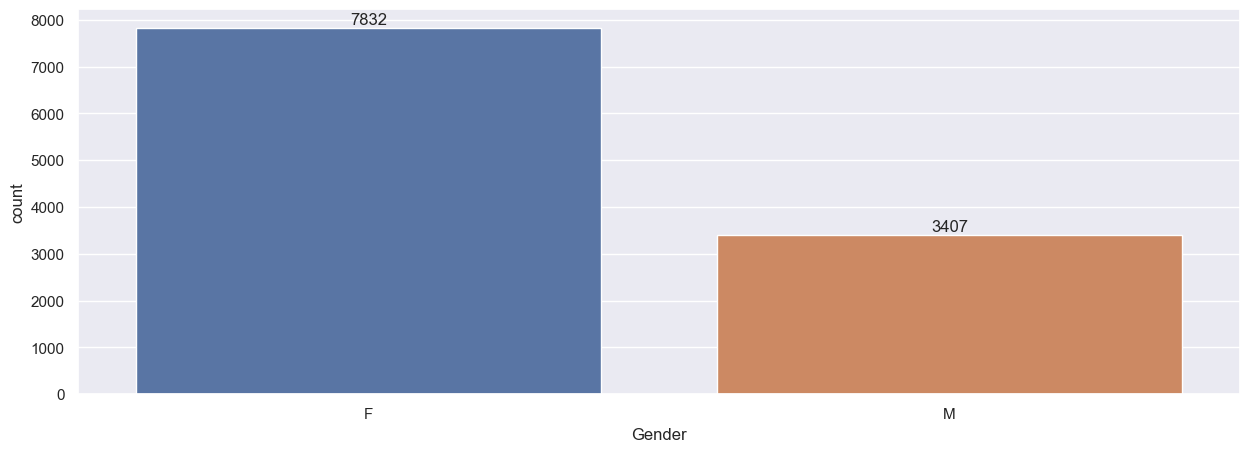

In [100]:
ax = sns.countplot(x= 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

Age-Wise sales Analysis

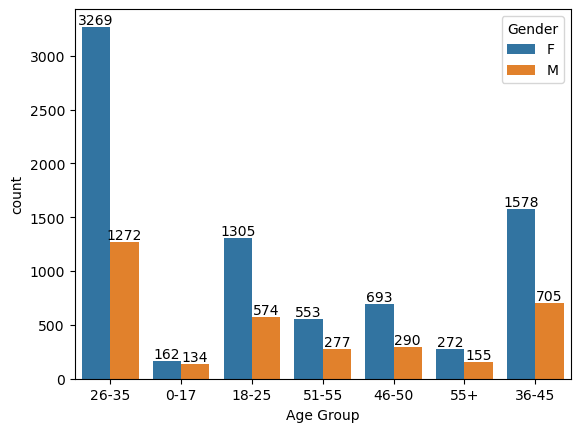

In [15]:
#Shows us which the age group and gender that contributes highest to the sales 
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
                   


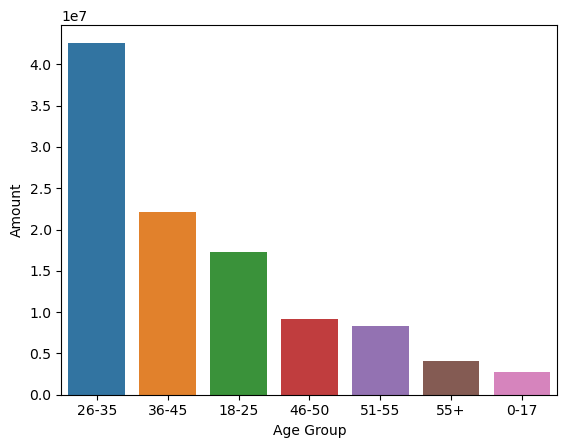

In [16]:
sales_data = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

ax = sns.barplot(x= 'Age Group', y = 'Amount' , data = sales_data)


From above graphs we can see that most of the buyers are of age group between 26-35 yrs female



State-Wise sales Analysis

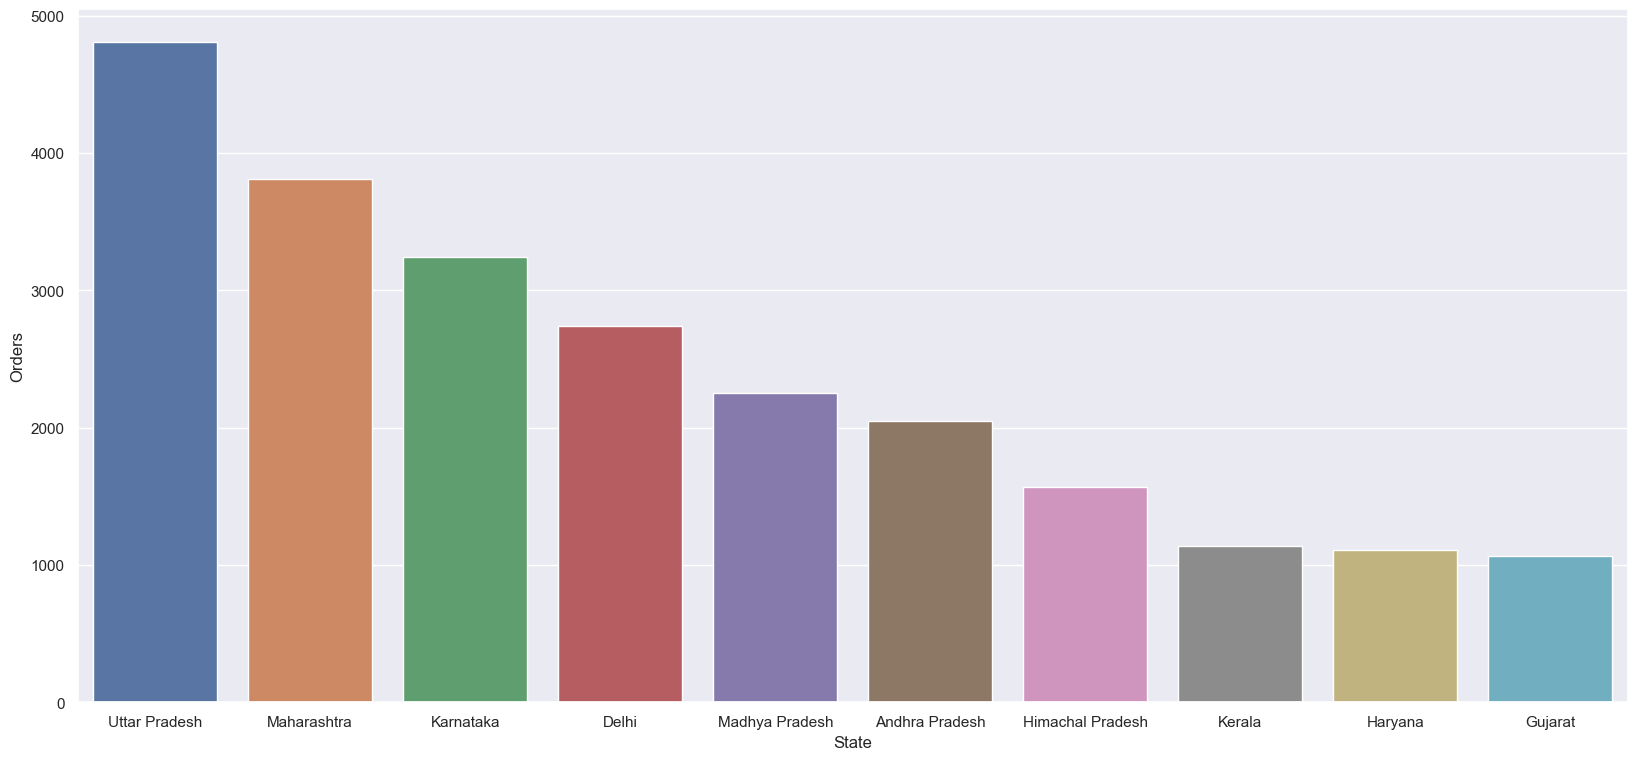

In [102]:
# total number of orders from top 10 states
state_wise_sales = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
ax = sns.barplot(x = 'State', y = 'Orders', data = state_wise_sales)
sns.set(rc = {'figure.figsize':(20,9)})

<Axes: xlabel='State', ylabel='Amount'>

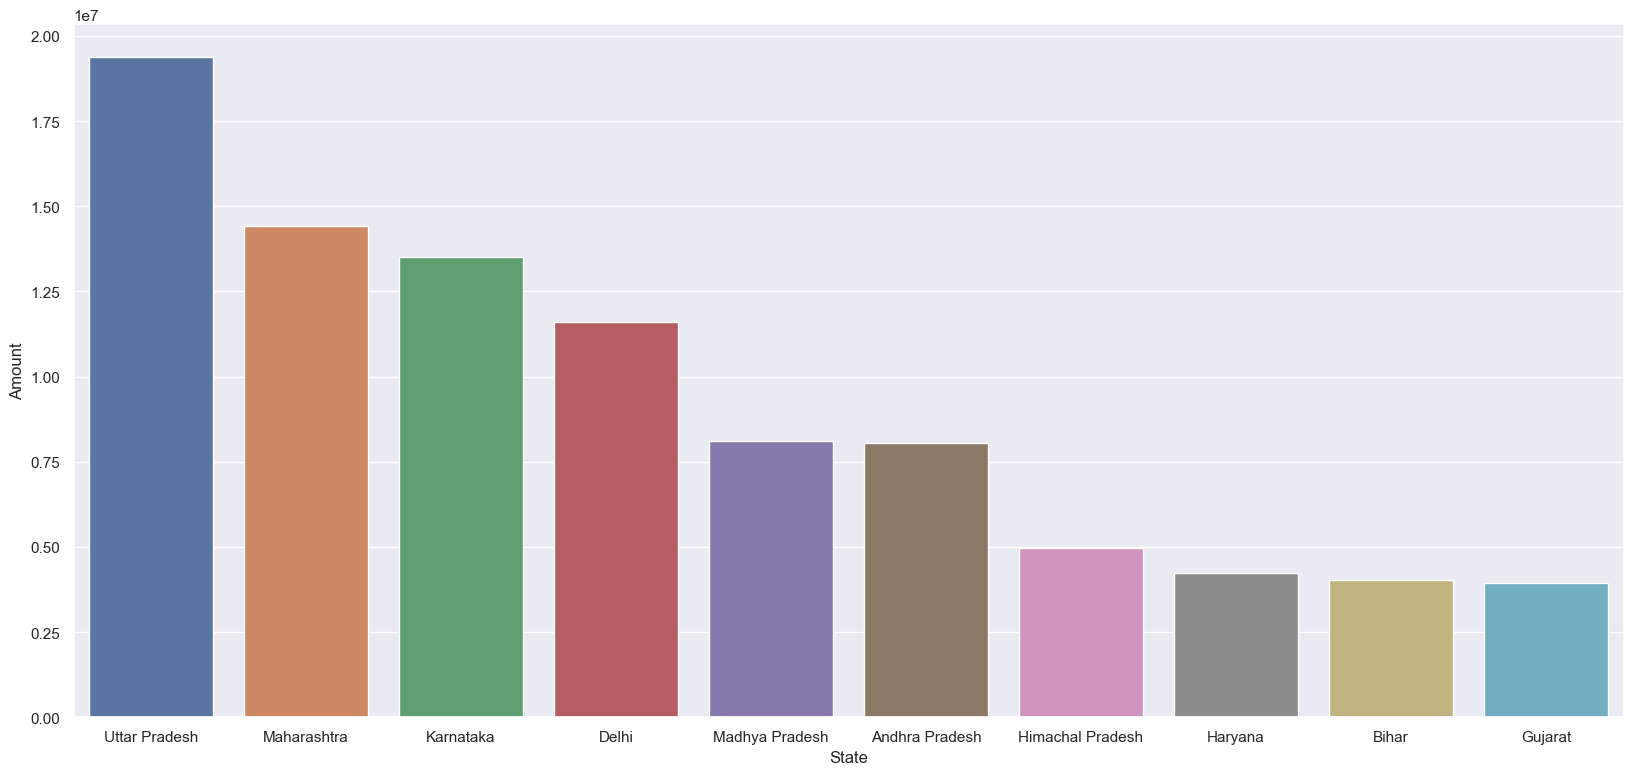

In [103]:
# total amount/sales from top 10 states
state_sale = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,9)})
sns.barplot(x = 'State', y= 'Amount', data = state_sale)


Marital status-Wise sales Analysis

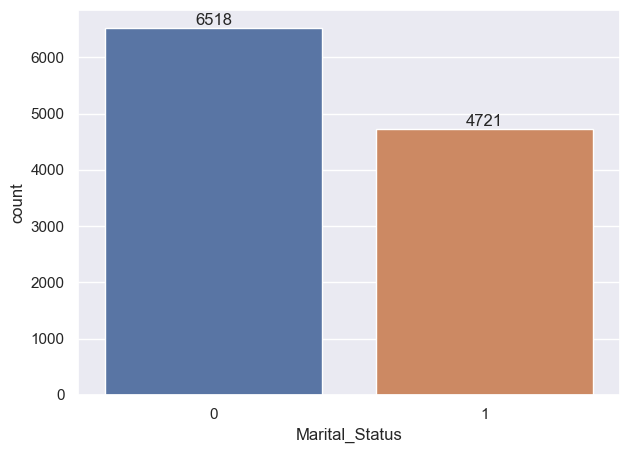

In [48]:
ax = sns.countplot(x = 'Marital_Status', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(7,5)})

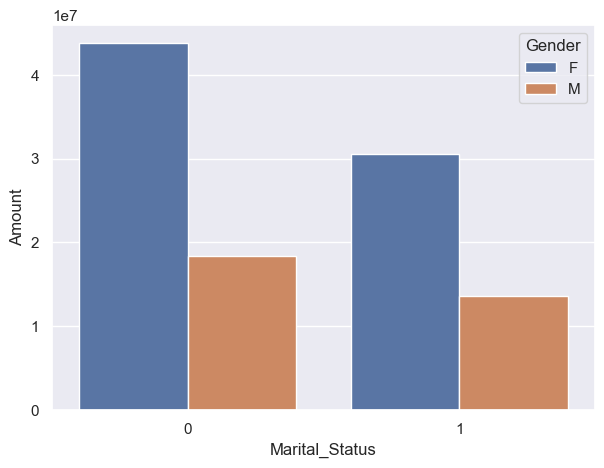

In [56]:
gender_marital_sales_data = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().sort_values(ascending=False)
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=gender_marital_sales_data.reset_index())
sns.set(rc={'figure.figsize':(7,5)})


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

Occupation-Wise Analysis

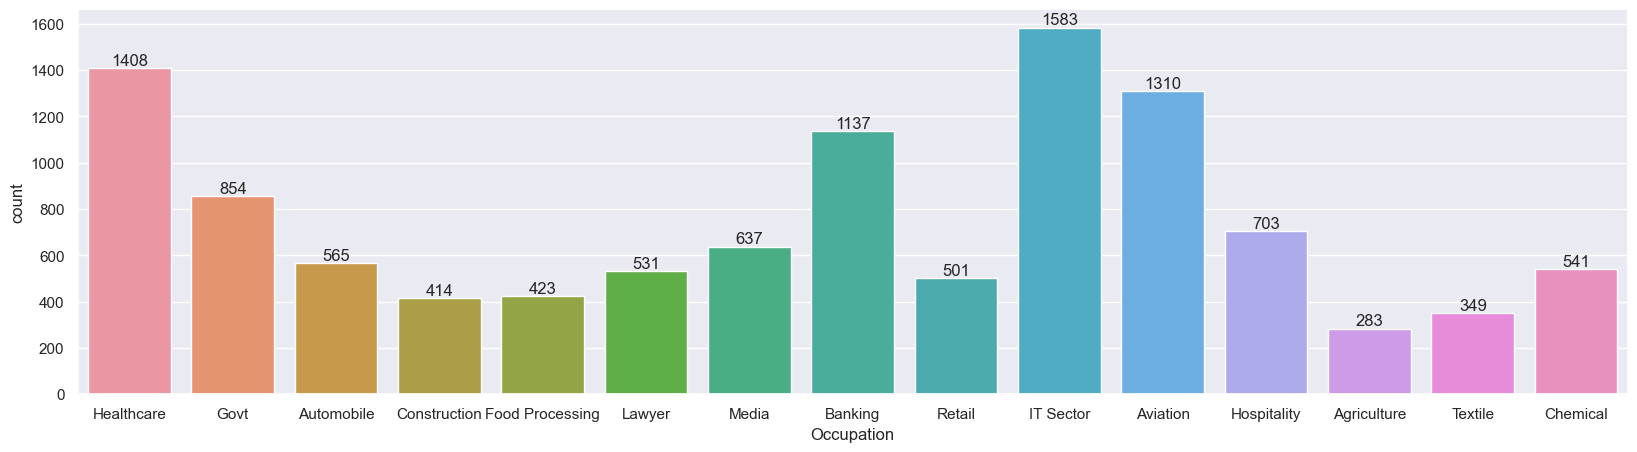

In [66]:
ax = sns.countplot(x = 'Occupation', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc = {'figure.figsize':(20,5)})

<Axes: xlabel='Occupation', ylabel='Amount'>

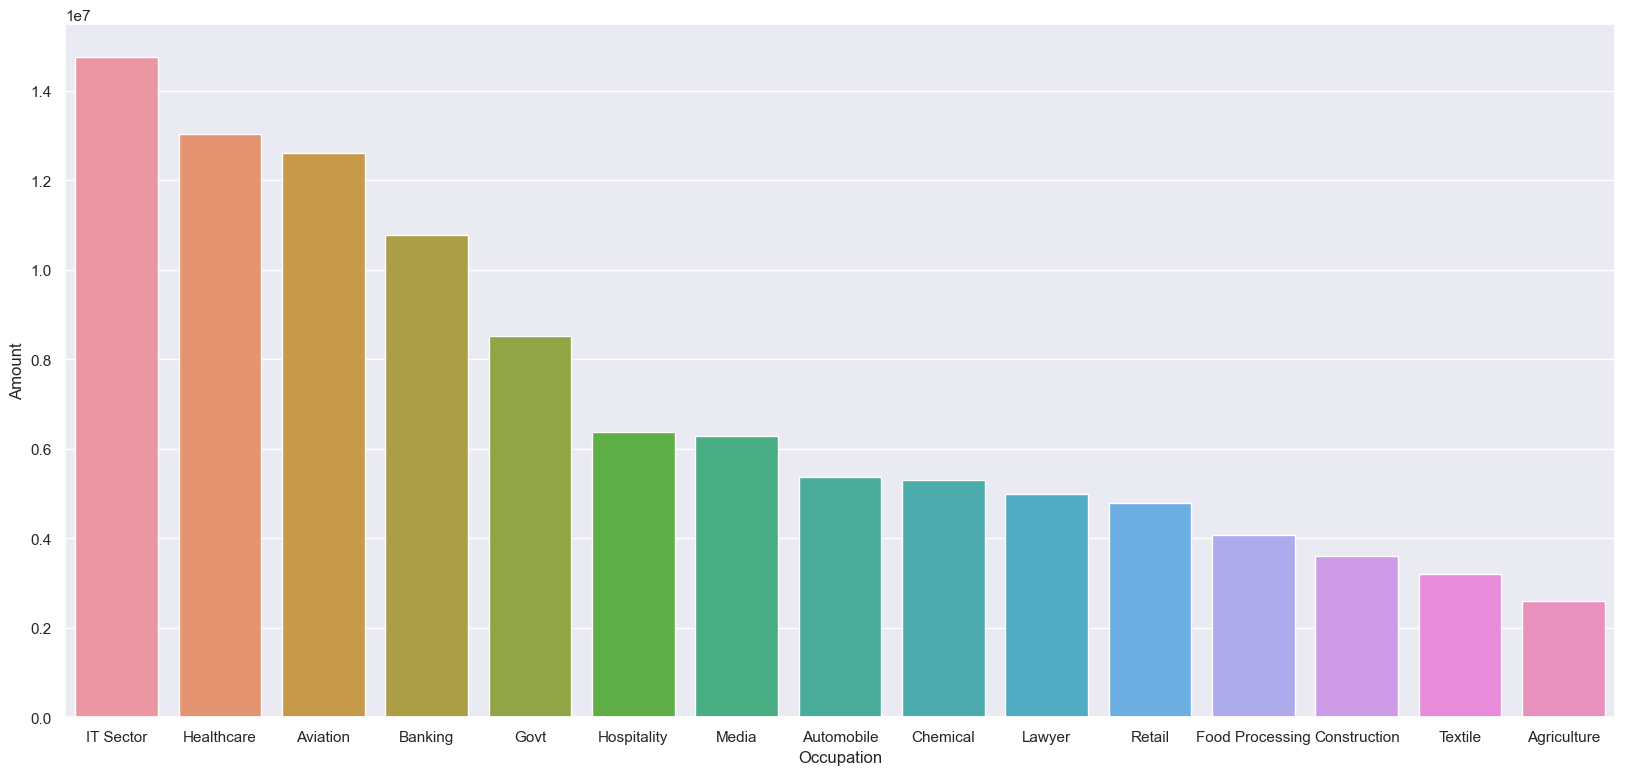

In [70]:
Occupation_sale = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(20,9)})
sns.barplot(x = 'Occupation', y= 'Amount', data = Occupation_sale)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

Product Category-Wise Analysis

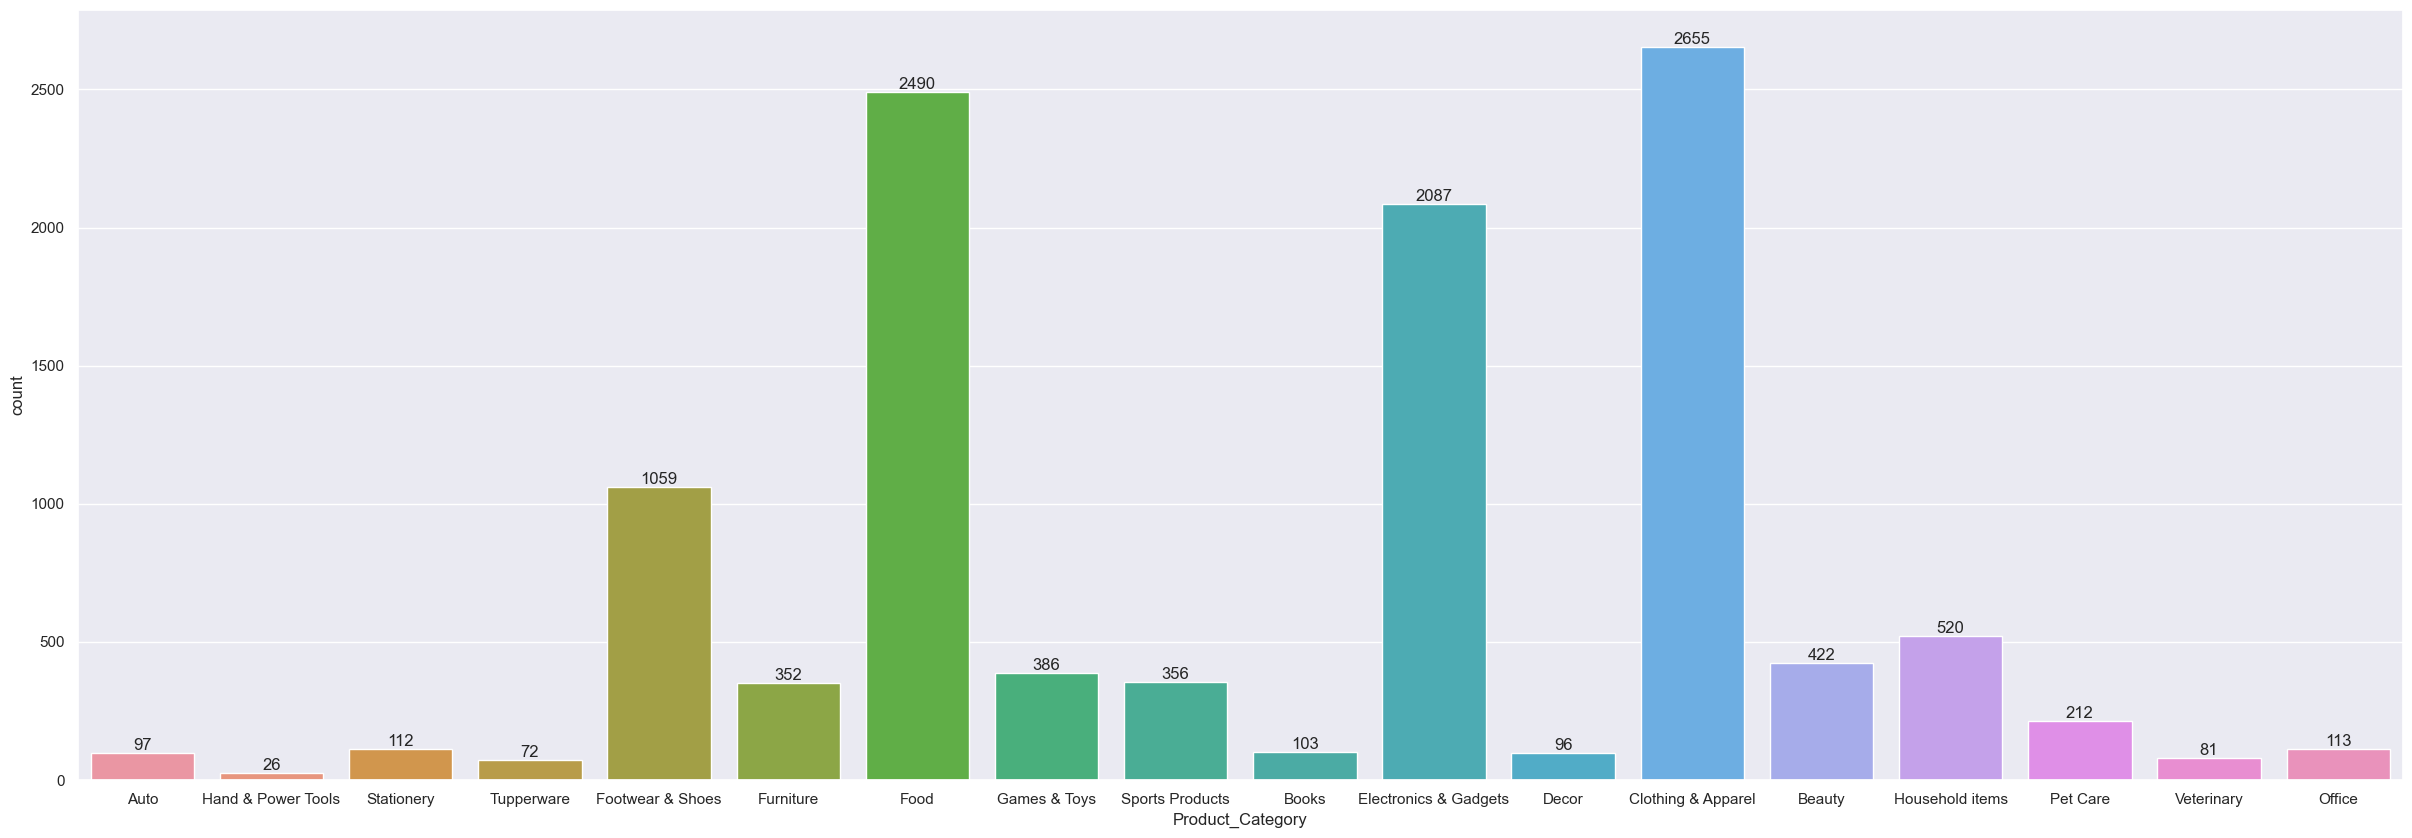

In [82]:
ax = sns.countplot(x = 'Product_Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(30,10)})

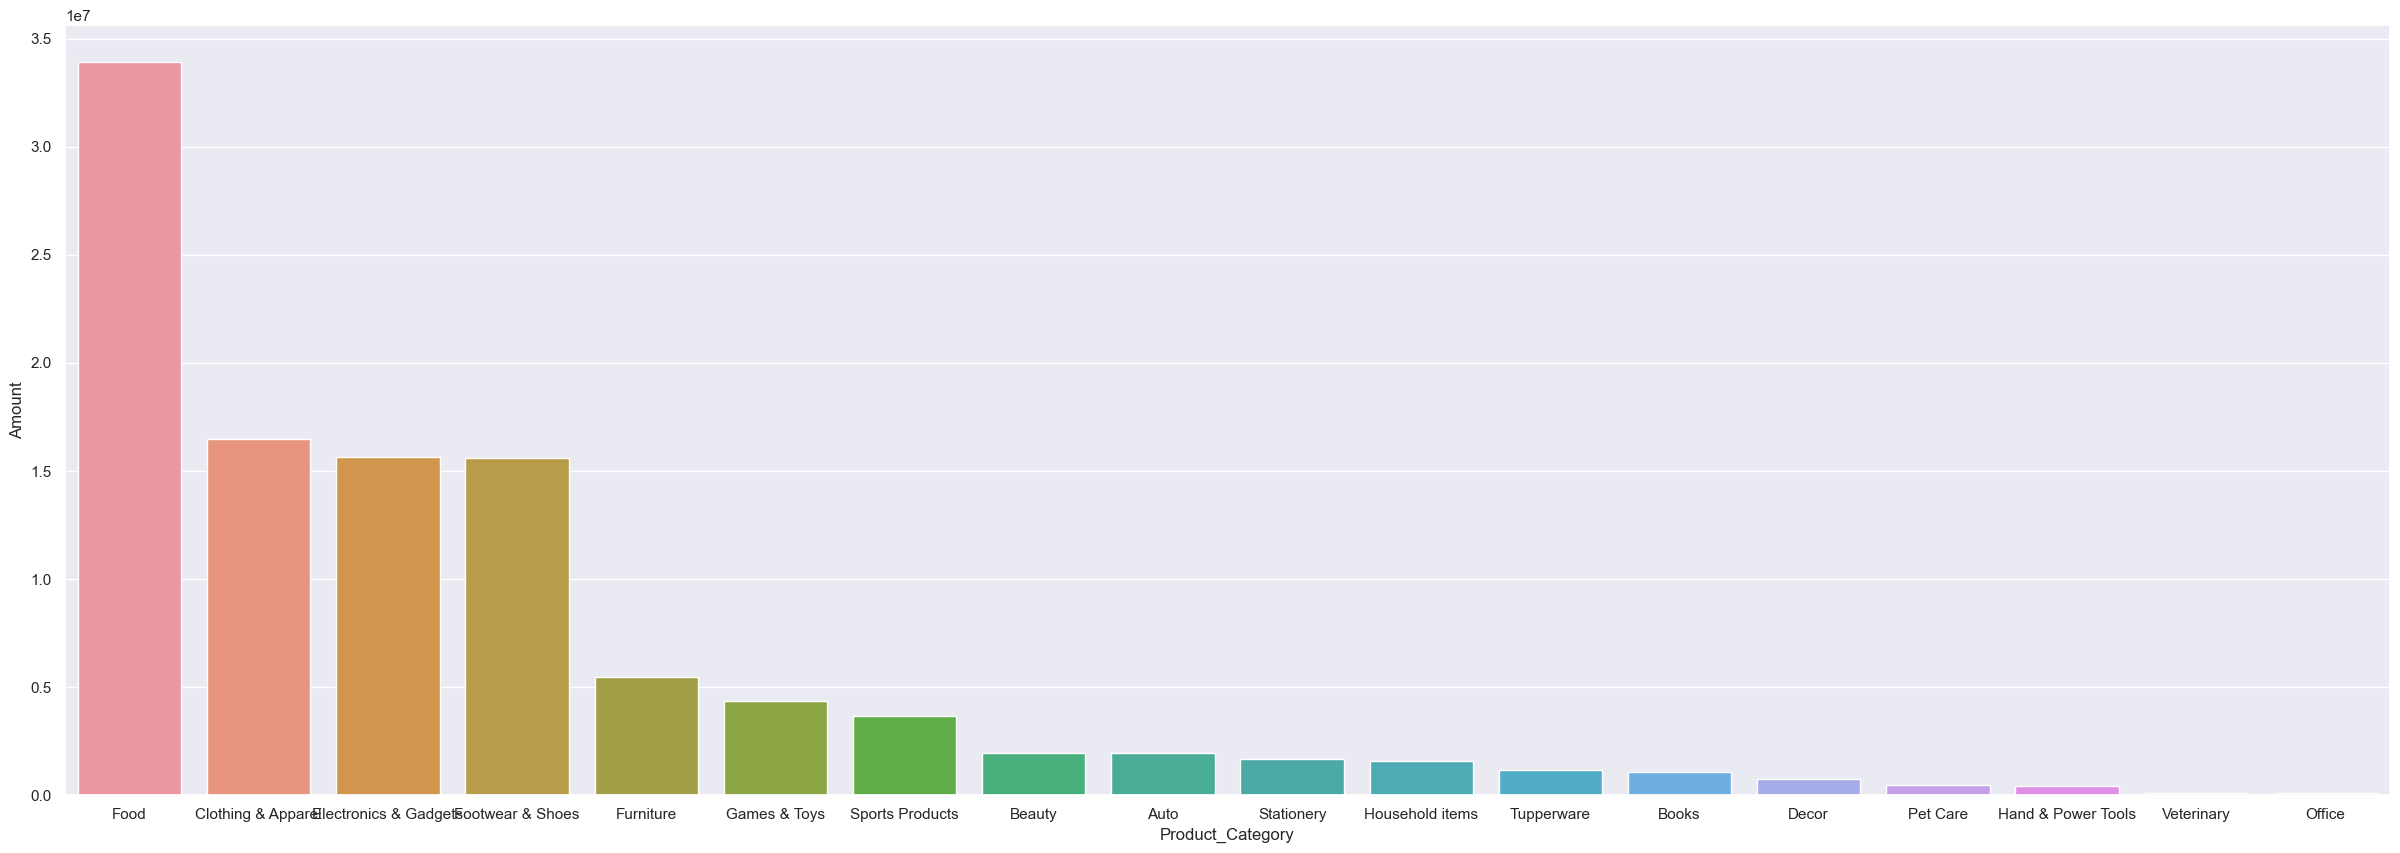

In [95]:
ProductCat_sales = df.groupby(['Product_Category'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Product_Category', y='Amount', data=ProductCat_sales)
sns.set(rc={'figure.figsize':(15,5)})


From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

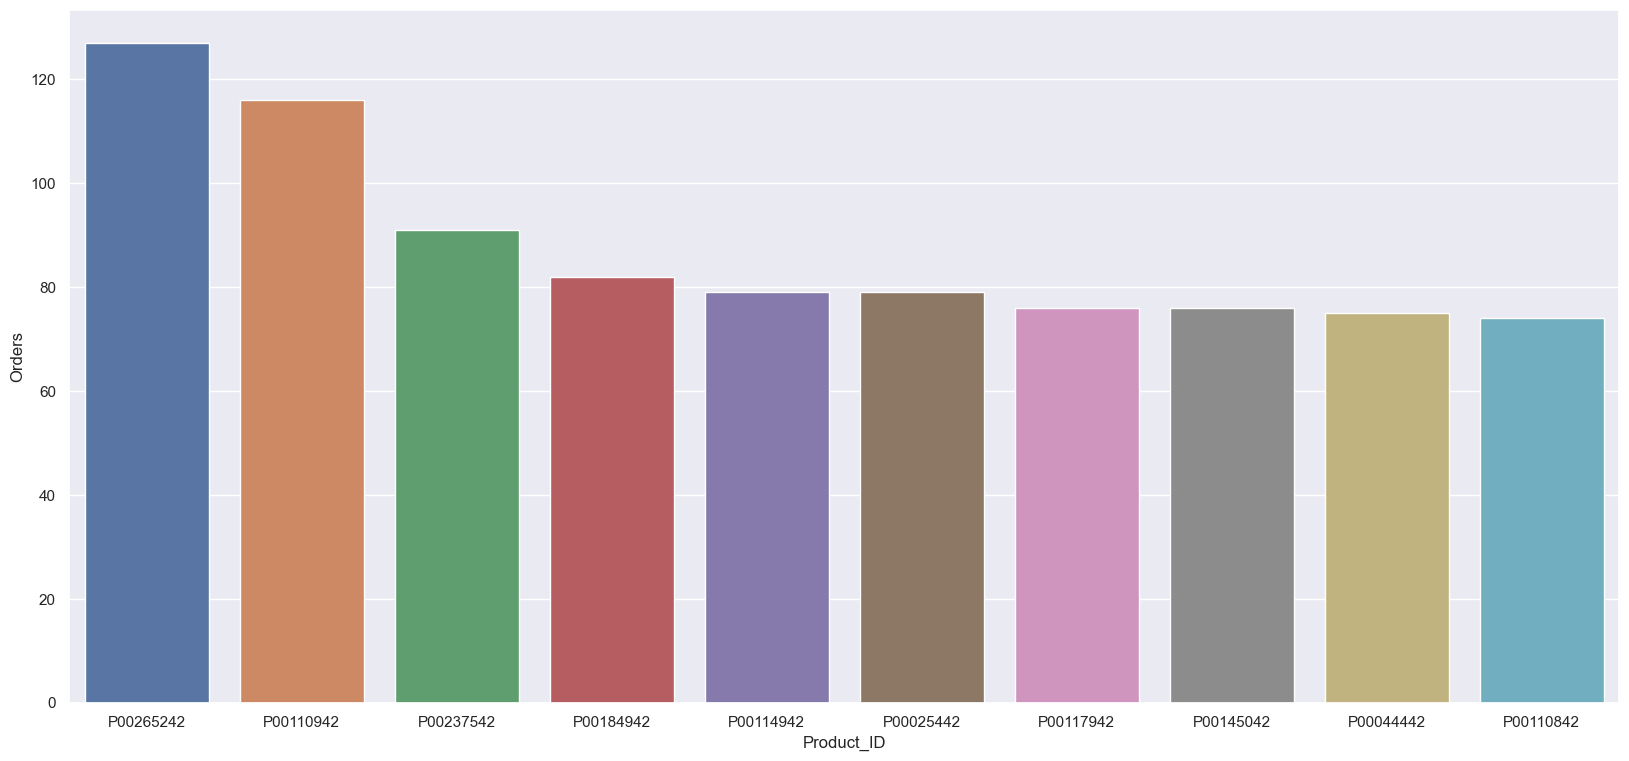

In [104]:
# top 10 most sold products 
ProductID_sales = df.groupby(['Product_ID'])['Orders'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Product_ID', y='Orders', data=ProductID_sales)
sns.set(rc={'figure.figsize':(15,5)})